Code for project 2

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import Callback
import numpy as np

Plot of the variables: High, Low, Close

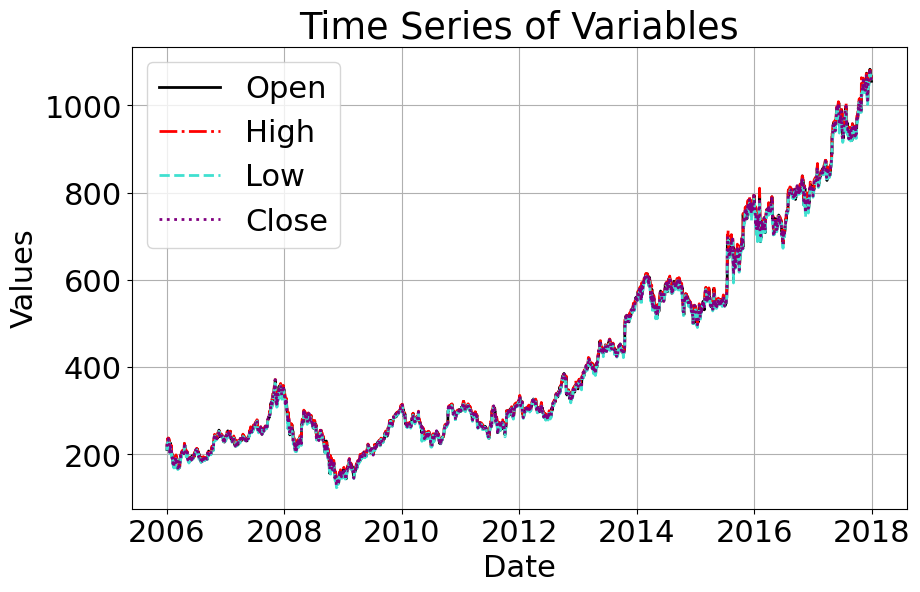

In [2]:
data = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

data = data.drop("Name", axis=1)
data.set_index('Date', inplace=True)
Open=data['Open']
High=data['High']
Low=data['Low']
Close=data['Close']
Volume=data['Volume']
plt.figure(figsize=(10, 6))
plt.plot(data.index, Open, label='Open', linewidth=2, linestyle='-', color='black' )
plt.plot(data.index, High, label='High', linewidth=2, linestyle='-.', color='red' )
plt.plot(data.index, Low, label='Low', linewidth=2, linestyle='--', color='turquoise' )
plt.plot(data.index, Close, label='Close', linewidth=2,linestyle=':', color='purple' )
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of Variables')
plt.legend()
plt.grid(True)
plt.show()




Plot mean and SD envelopes to see better

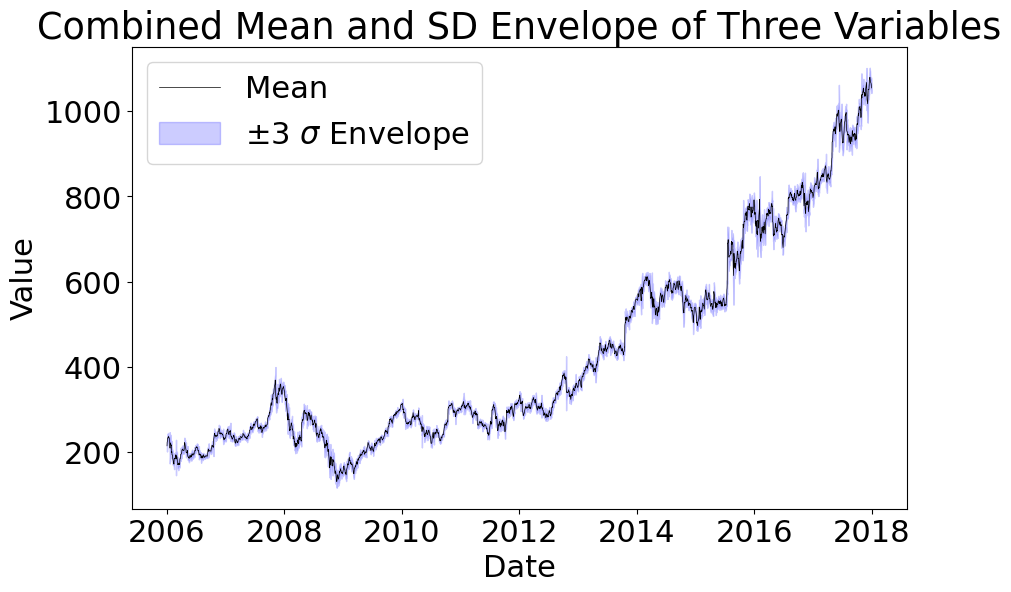

In [4]:
mean_all = data.iloc[:, [0,1, 2, 3]].mean(axis=1)
std_dev_all = data.iloc[:, [0,1, 2, 3]].std(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(data.index, mean_all, label='Mean', color='black', linewidth=0.5)
plt.fill_between(
    data.index,
    mean_all - 3*std_dev_all,  
    mean_all + 3*std_dev_all,  
    color='blue',
    alpha=0.2,  # Adjust transparency
    label='±3 $\sigma$ Envelope'
)

# Labeling the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Combined Mean and SD Envelope of Three Variables')
plt.legend()
plt.show()


Plot of the variable Volume

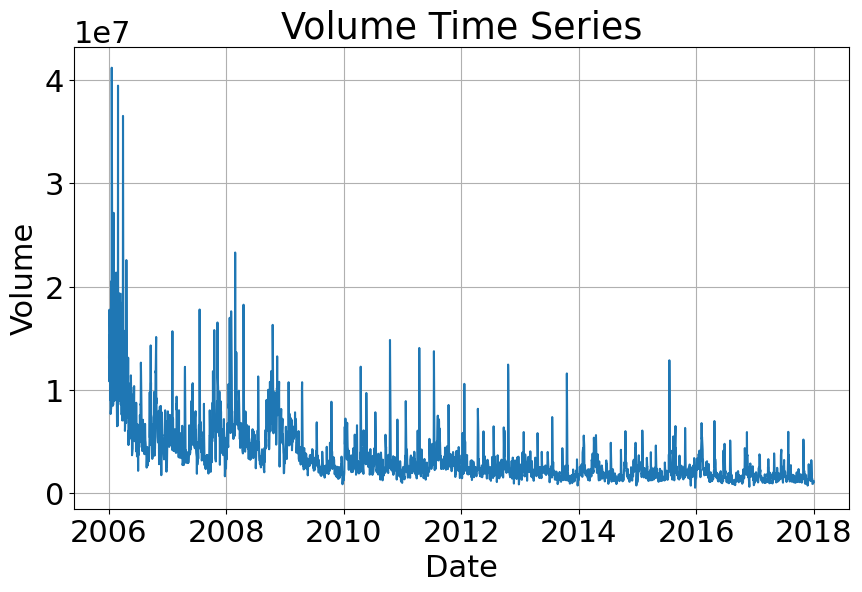

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, Volume, label="Volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Time Series')
plt.grid(True)
plt.savefig("Volume Time Series.png")
plt.show()

Seasonal Trent decomposition using LOESS (STL)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")


Seasonal Trend Decomposition


C:\Users\anton\AppData\Local\Temp\ipykernel_14024\1046671661.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[cs] = data[cs].fillna(method='ffill')


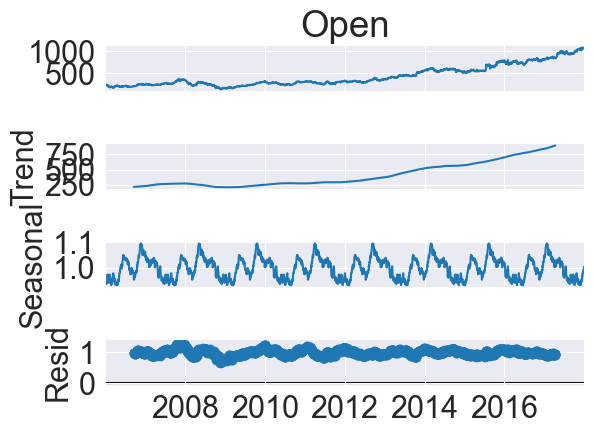

C:\Users\anton\AppData\Local\Temp\ipykernel_14024\1046671661.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[cs] = data[cs].fillna(method='ffill')


<Figure size 640x480 with 0 Axes>

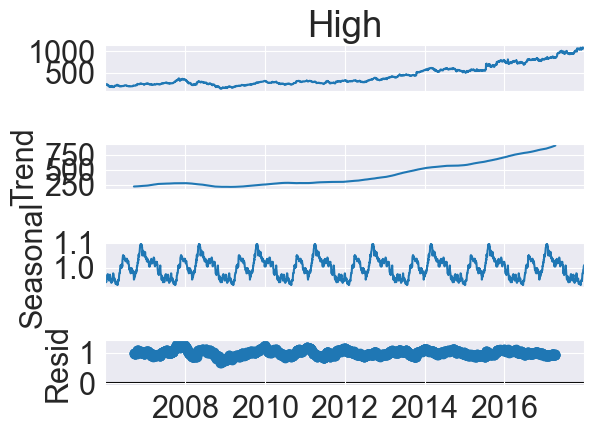

C:\Users\anton\AppData\Local\Temp\ipykernel_14024\1046671661.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[cs] = data[cs].fillna(method='ffill')


<Figure size 640x480 with 0 Axes>

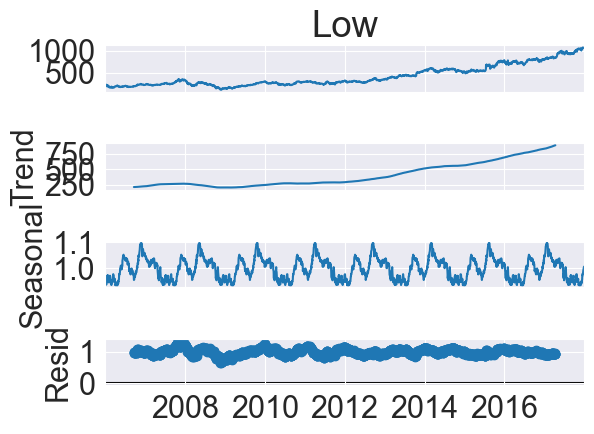

C:\Users\anton\AppData\Local\Temp\ipykernel_14024\1046671661.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[cs] = data[cs].fillna(method='ffill')


<Figure size 640x480 with 0 Axes>

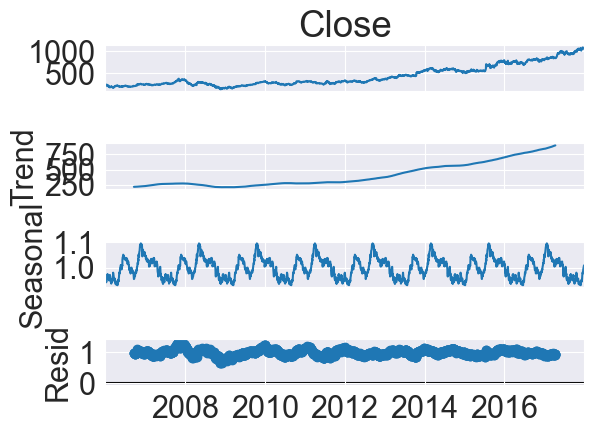

C:\Users\anton\AppData\Local\Temp\ipykernel_14024\1046671661.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[cs] = data[cs].fillna(method='ffill')


<Figure size 640x480 with 0 Axes>

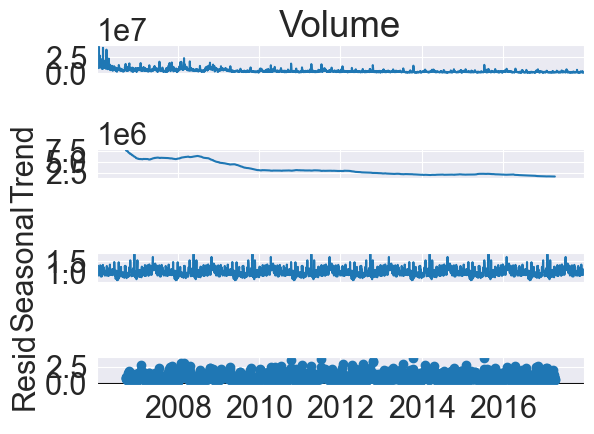

<Figure size 640x480 with 0 Axes>

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

cases=["Open","High","Low","Close", "Volume"]
results={}
for cs in cases:
    data[cs] = data[cs].fillna(method='ffill')
    data[cs].index = pd.to_datetime(data.index)
    data[cs] = data[cs].asfreq('B')

    # daily seasonality
    result = seasonal_decompose(data[cs], model='multiplicative', period=365)
    results[cs]=result
    result.plot()
    plt.show()
    plt.savefig("TSDec_"+cs+".png")


Volume traded per price graph

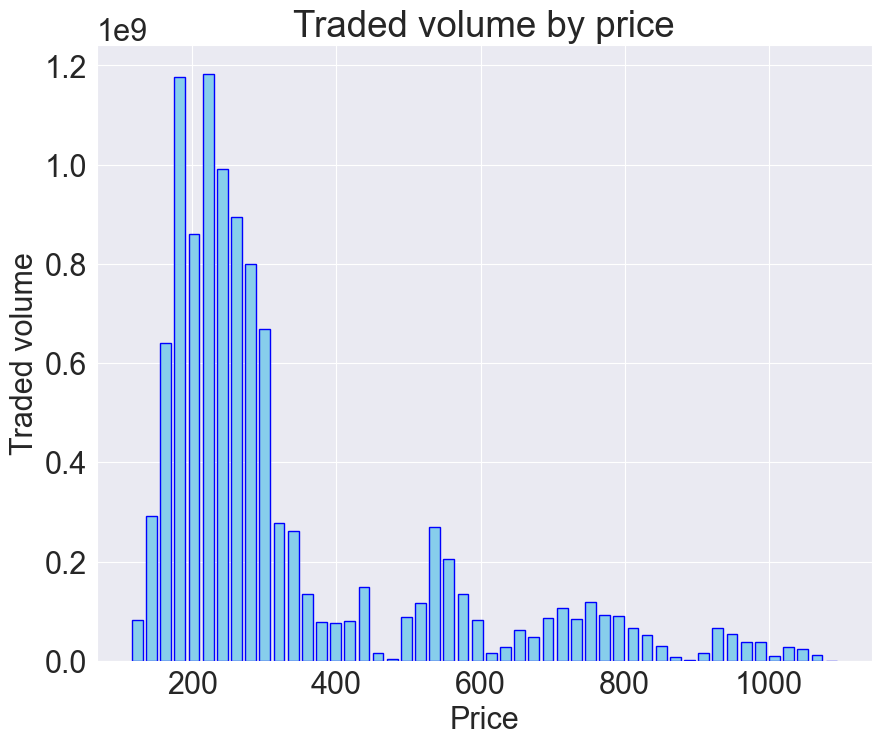

In [9]:
import numpy as np

num_bins = 50 # Number of bins

# Define price bins based on high and low price
price_min = data['Low'].min()
price_max = data['High'].max()
bins = np.linspace(price_min, price_max, num_bins)

# Calculate the midpoints of the bins for plotting

# Calculate the volume in each price bin
volume_by_price = np.zeros(len(bins))

for i in range(len(bins)-1):
    mask = (Close >= bins[i]) & (Close < bins[i + 1])
    volume_by_price[i] = Volume[mask].sum()

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Create a horizontal bar chart for volume by price
ax.bar(bins, volume_by_price, align='center', color='skyblue', edgecolor='blue', width=15)
ax.set_xlabel('Price')
ax.set_ylabel('Traded volume')
ax.set_title('Traded volume by price')
plt.savefig("Traded volume by price.png")
plt.show()

Autocorrelation analysis

            0        1        2        3           4
0      211.47   218.05   209.32   217.83  13137450.0
1      222.17   224.70   220.09   222.84  15292353.0
2      223.22   226.00   220.97   225.85  10815661.0
3      228.66   235.49   226.85   233.06  17759521.0
4      233.44   236.94   230.70   233.68  12795837.0
...       ...      ...      ...      ...         ...
3014  1070.00  1071.72  1067.64  1068.86    889446.0
3015  1068.64  1068.86  1058.64  1065.85    918767.0
3016  1066.60  1068.27  1058.38  1060.20   1116203.0
3017  1062.25  1064.84  1053.38  1055.95    994249.0
3018  1055.49  1058.05  1052.70  1053.40   1180340.0

[3019 rows x 5 columns]
          0         1         2         3         4
0  1.000000  0.999894  0.999841  0.999742 -0.443155
1  0.999894  1.000000  0.999827  0.999866 -0.440717
2  0.999841  0.999827  1.000000  0.999896 -0.447781
3  0.999742  0.999866  0.999896  1.000000 -0.444590
4 -0.443155 -0.440717 -0.447781 -0.444590  1.000000


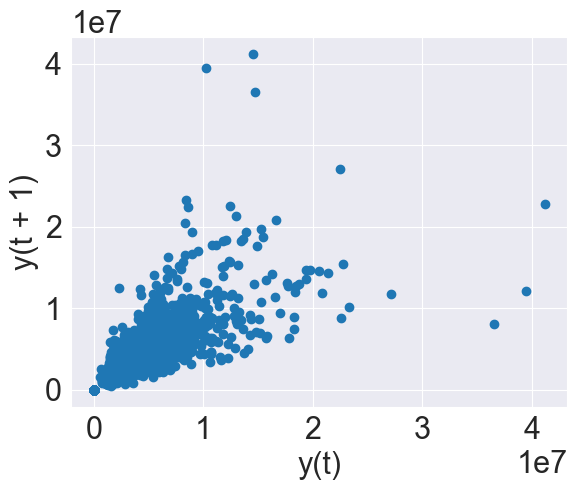

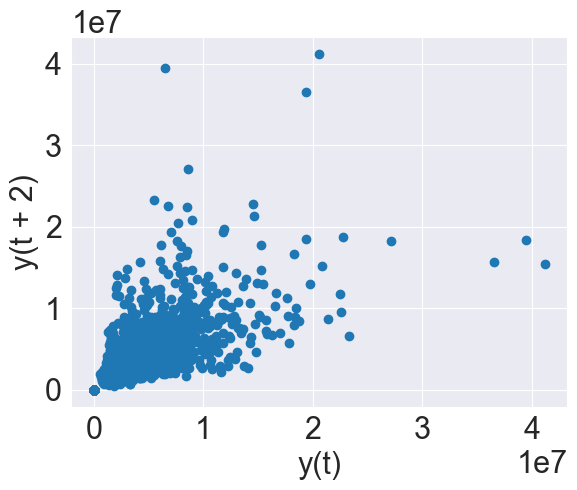

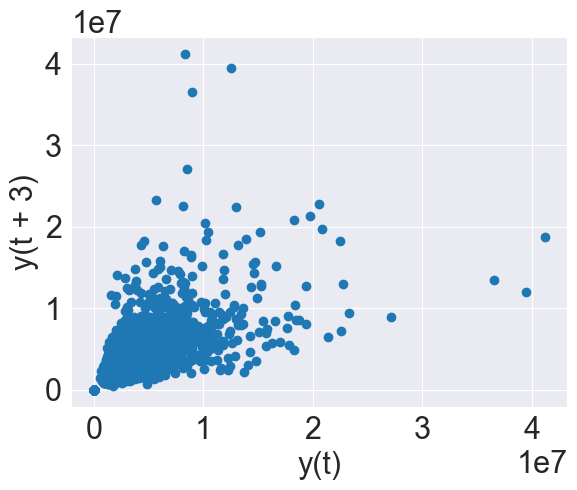

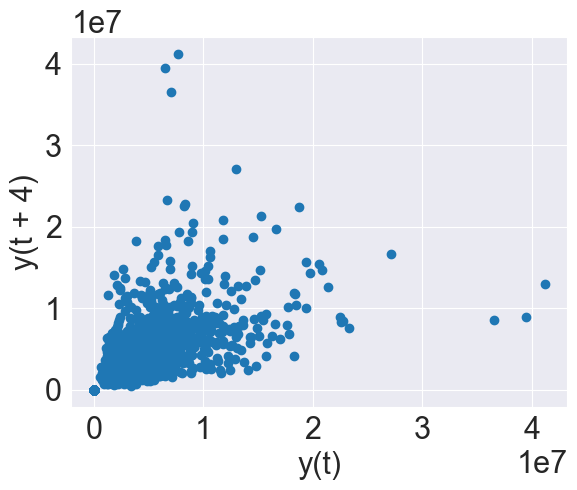

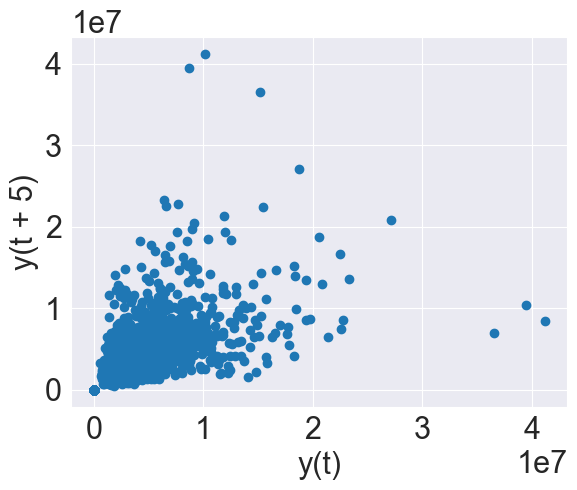

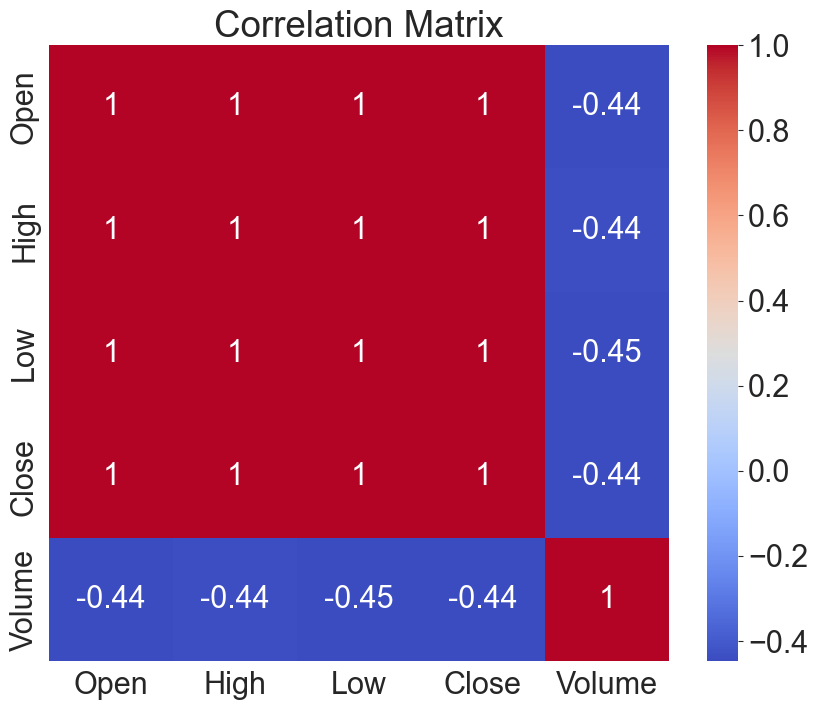

<Figure size 640x480 with 0 Axes>

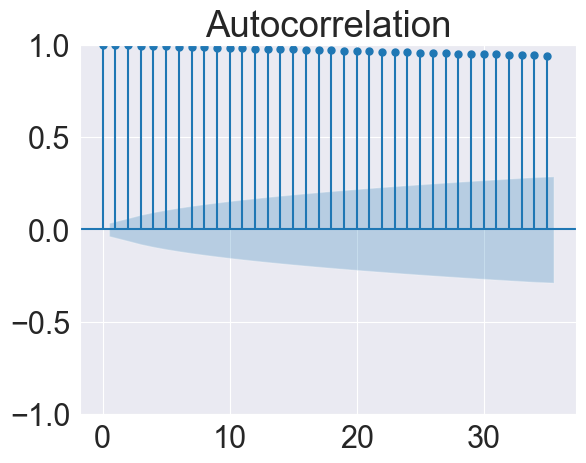

<Figure size 640x480 with 0 Axes>

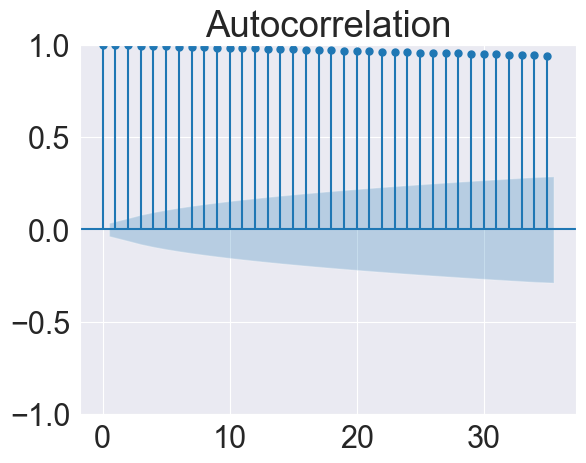

<Figure size 640x480 with 0 Axes>

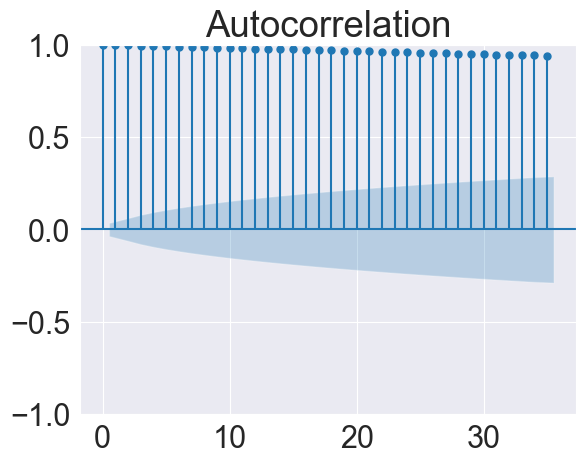

<Figure size 640x480 with 0 Axes>

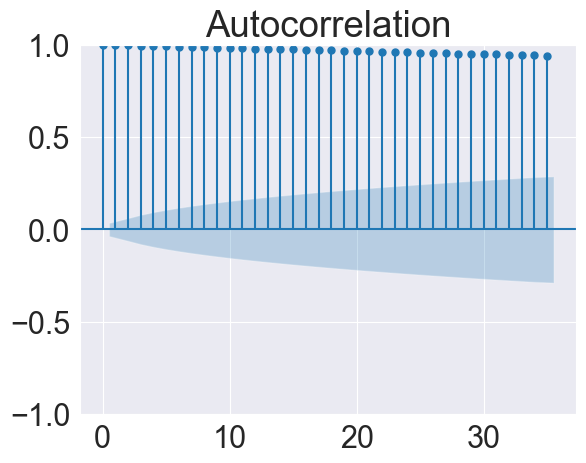

<Figure size 640x480 with 0 Axes>

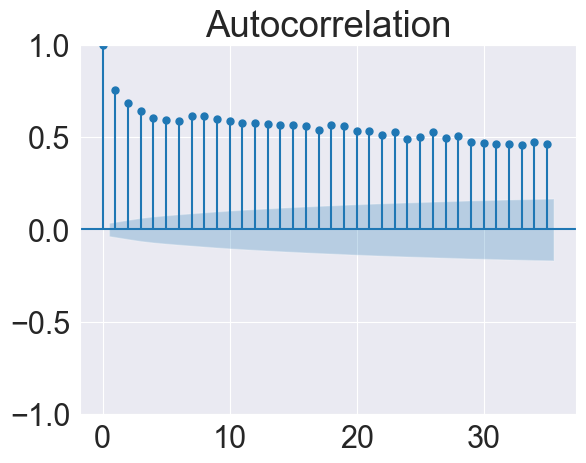

In [ ]:
# lagplot
for i in range(5):
    plt.figure()
    pd.plotting.lag_plot(data, lag=i+1)
    #plt.title("Lag plot of variable '" + data.columns[i]  + "'")
    plt.savefig("Lag_plot_" + str(i) + ".png")
 
# extracting only the temperature values
values = pd.DataFrame(data.values)
print(values)

# Create correlation matrix
correlation_matrix = values.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optionally, plot the correlation matrix for better visualization
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=data.columns, yticklabels=data.columns)
plt.title("Correlation Matrix")
plt.show()

from statsmodels.graphics.tsaplots import plot_acf

for i in range(5):
    plt.figure()
    plot_acf(data.iloc[:, i])
    #plt.title("Autocorrelation of variable '" + data.columns[i]  + "'")
    plt.title("")
    plt.savefig("auc_" + str(i) + ".png")



$\mathbb{Autoregressive \quad part}$

Try only for Open at the moment

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [23]:
cases=["Open", "Close", "Low", "High", "Volume"]
rmse_residuals={}
for cs in cases:
  series=data[cs] # change with close, Min, Max, Volume
  T = 10 # we should find a T that creates decets results. 
  X = []
  Y = []
  rmse_residuals[cs]={}

  for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

  X = np.array(X).reshape(-1, T)
  Y = np.array(Y)
  N = len(X)
  print("X.shape", X.shape, "Y.shape", Y.shape)


  # Try autoregressive model
  i = Input(shape=(T,))
  x = Dense(1)(i)
  model = Model(i, x)
  model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
  )

  # train 
  r = model.fit(
      X[:-N//2], Y[:-N//2],
      epochs=80,
      validation_data=(X[-N//2:], Y[-N//2:]),
  )

  # Plot loss per iteration
  plt.plot(r.history["loss"], label="Training Loss")
  plt.plot(r.history["val_loss"], label="Validation loss")
  plt.legend()
  plt.savefig("Loss_per_iteration_"+cs+".png")
  plt.close()

  # Forecast future values
  validation_target = Y[-int(N*0.2):] # use as validation only the last 20% of the data
  validation_predictions = []

  # Last train input
  last_x = X[-int(N*0.2)]

  while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array
  
    # Update predictions list
    validation_predictions.append(p)

    # Make the new input
    last_x = np.roll(last_x, -1) # shift everything one spot to the left, we replace it with the latest forecasted prediction. Multi-step predictions.
    last_x[-1] = p
  
  plt.plot(validation_target, label="forecast_target")
  plt.plot(validation_predictions, label="forecast_prediction")
  plt.legend()
  plt.savefig("forecast_target_vs_prediction_"+cs+".png")
  plt.close()

  # Compare rmse of the model and the mean of the residuals: if they are similar, we can say that the model is good
  rmse_residuals[cs]["RMSE"]=np.sqrt(np.mean((validation_target - validation_predictions)**2))
  rmse_residuals[cs]["mean_residuals"]=np.mean(results[cs].resid)


/tmp/ipykernel_2089/3323767216.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = series[t+T]


X.shape (3009, 10) Y.shape (3009,)
Epoch 1/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 10428.0264 - val_loss: 3067.2034
Epoch 2/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 263.6774 - val_loss: 526.1049
Epoch 3/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 129.0497 - val_loss: 987.2111
Epoch 4/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 165.8893 - val_loss: 381.1114
Epoch 5/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 121.6236 - val_loss: 356.0323
Epoch 6/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 146.5537 - val_loss: 339.1769
Epoch 7/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 128.5479 - val_loss: 684.3471
Epoch 8/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 119.1853 - val_loss: 323.3362
Epoch 9/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 112.9630 - val_loss: 859.8878
Epoch 10/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 163.9922 - val_loss: 454.9472
Epoch 11/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 115.5727 - val_l

In [24]:
df = pd.DataFrame.from_dict(rmse_residuals, orient='index')

# Display the DataFrame
print(df)

                RMSE  mean_residuals
Open    3.629582e+05        0.994755
Close   7.857135e+02        0.994770
Low     7.541402e+04        0.994740
High    5.111316e+09        0.994843
Volume  1.426028e+10        0.994143


***RNN Part***

In [3]:
N=len(data)
Tp=int(0.8*N)

In [6]:
# needed functions

def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

class MyCallback(Callback): #to show messages every 50 epochs
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

### Keras model with `SimpleRNN` layer: hyperparameters

- 256 neurons in the RNN layer
- 32 denurons in the densely connected layer
- a single neuron for the output layer
- ReLu activation
- learning rate: 0.001

In [14]:
def build_simple_rnn(num_units=128, embedding=4,num_dense=32,lr=0.001):
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of a the simple RNN layer
              embedding: Embedding length
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              lr: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=lr),metrics=['mse'])
    
    return model

RNN for all the variables

Variable: Open
Train data length: (2415,)
Test data length: (604,)
Train data length: (2419,)
Test data length: (608,)
Training data shape: (2415, 1, 4) ,  (2415,)
Test data shape: (604, 1, 4) ,  (604,)


/tmp/ipykernel_3407/2698960081.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test = np.append(test,np.repeat(test[-1],step))
/tmp/ipykernel_3407/2698960081.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train = np.append(train,np.repeat(train[-1],step))


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,185 (82.75 KB)

 Trainable params: 21,185 (82.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch number 50 done
Variable: Close
Train data length: (2415,)
Test data length: (604,)
Train data length: (2419,)
Test data length: (608,)
Training data shape: (2415, 1, 4) ,  (2415,)
Test data shape: (604, 1, 4) ,  (604,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,185 (82.75 KB)

 Trainable params: 21,185 (82.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch number 50 done
Variable: Low
Train data length: (2415,)
Test data length: (604,)
Train data length: (2419,)
Test data length: (608,)
Training data shape: (2415, 1, 4) ,  (2415,)
Test data shape: (604, 1, 4) ,  (604,)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)        │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,185 (82.75 KB)

 Trainable params: 21,185 (82.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch number 50 done
Variable: High
Train data length: (2415,)
Test data length: (604,)
Train data length: (2419,)
Test data length: (608,)
Training data shape: (2415, 1, 4) ,  (2415,)
Test data shape: (604, 1, 4) ,  (604,)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,185 (82.75 KB)

 Trainable params: 21,185 (82.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch number 50 done
Variable: Volume
Train data length: (2415,)
Test data length: (604,)
Train data length: (2419,)
Test data length: (608,)
Training data shape: (2415, 1, 4) ,  (2415,)
Test data shape: (604, 1, 4) ,  (604,)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)       │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,185 (82.75 KB)

 Trainable params: 21,185 (82.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch number 50 done


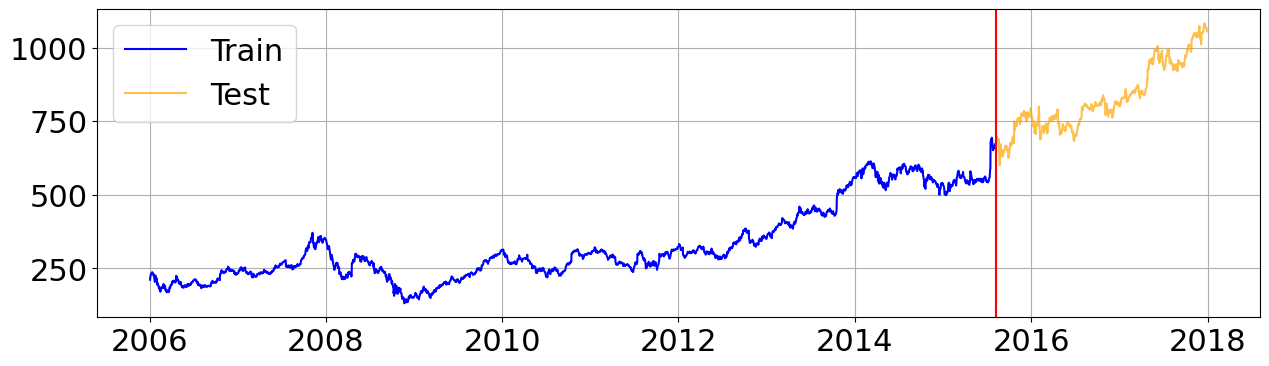

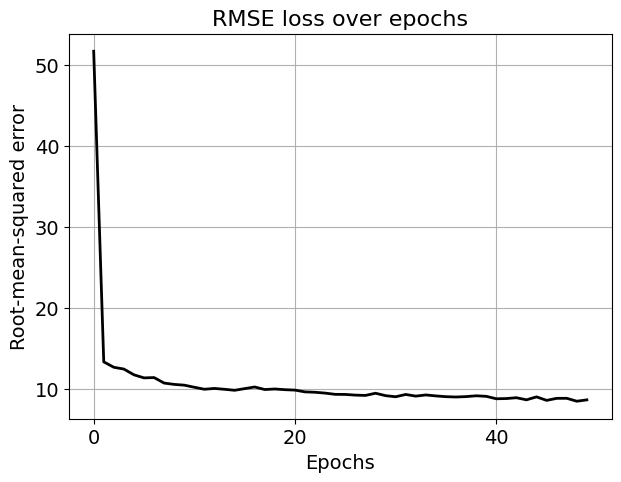

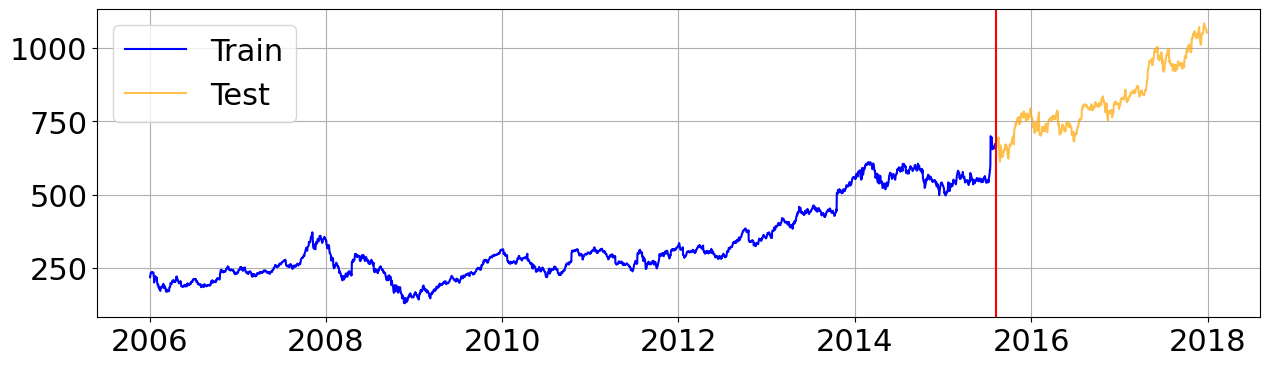

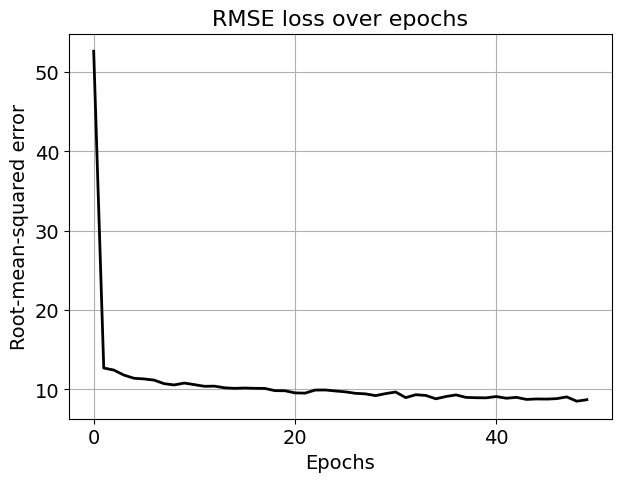

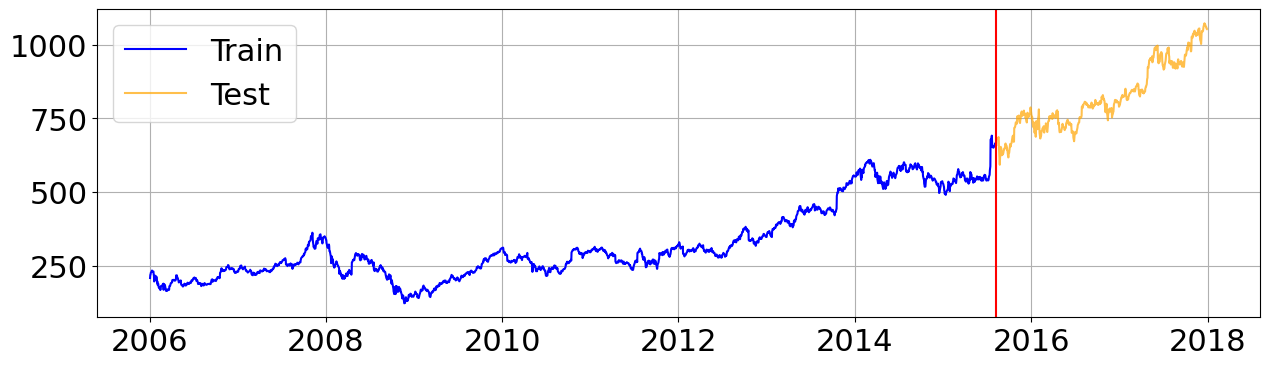

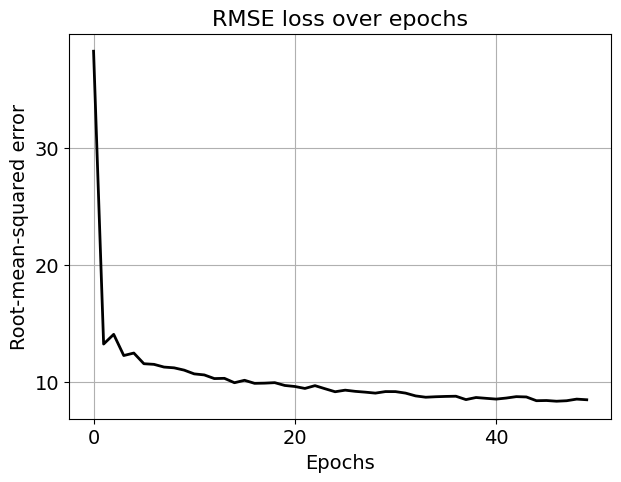

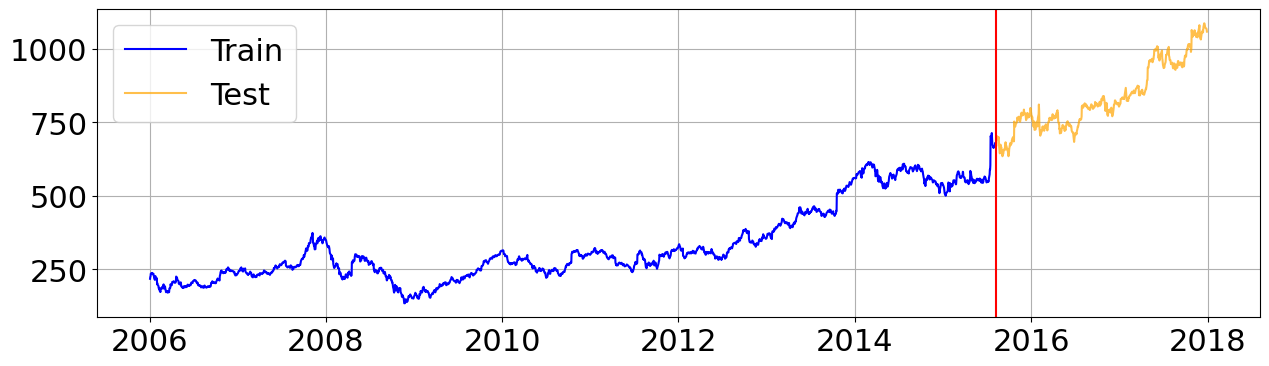

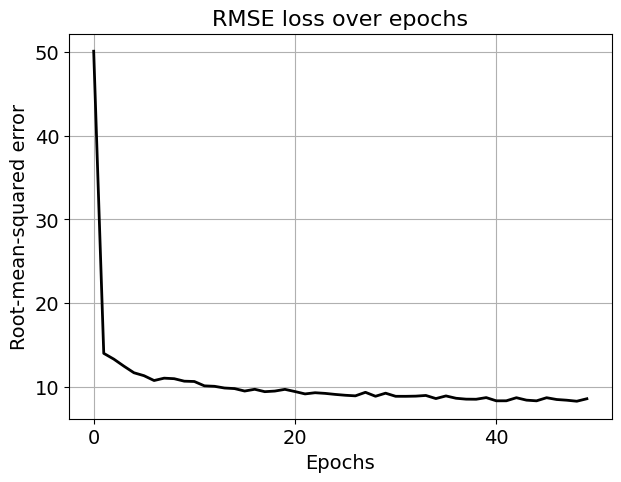

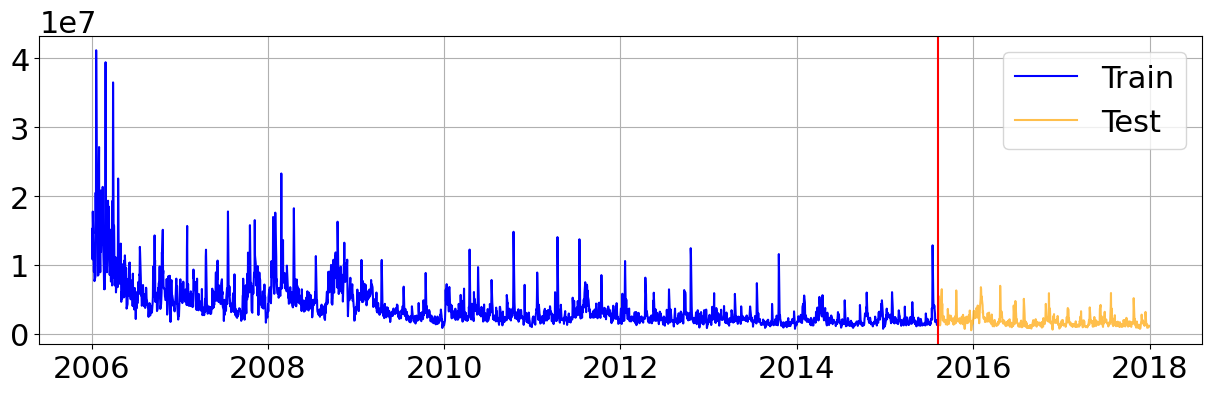

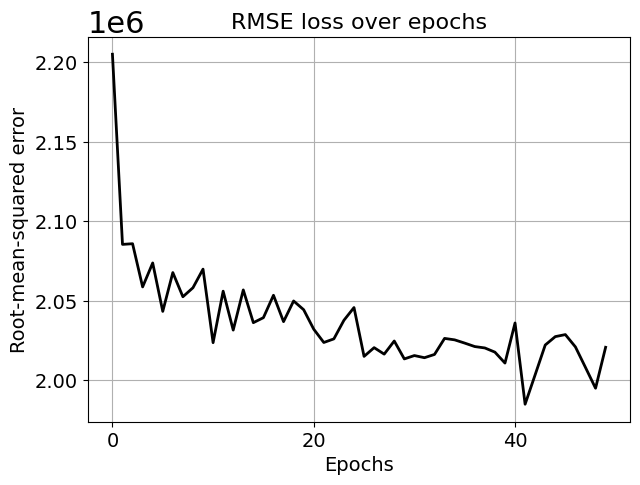

In [17]:
cases=["Open", "Close", "Low", "High", "Volume"]
rmse_residuals={}
for cs in cases:
    print("Variable:", cs)
    sequence=data[cs]
    train,test = sequence[0:Tp], sequence[Tp:N]
    print("Train data length:", train.shape)
    print("Test data length:", test.shape)

    index = data.index.values
    plt.figure(figsize=(15,4))
    plt.plot(index[0:Tp],train,c='blue')
    plt.plot(index[Tp:N],test,c='orange',alpha=0.7)
    plt.legend(['Train','Test'])
    plt.axvline(data.index[Tp], c="r")
    plt.grid(True)
    plt.savefig("Train_Test_RNN_"+cs+".png")

    # embedding with step=4, which is the embedding size

    step = 4

    # add step elements into train and test
    test = np.append(test,np.repeat(test[-1],step))
    train = np.append(train,np.repeat(train[-1],step))

    print("Train data length:", train.shape)
    print("Test data length:", test.shape)

    trainX,trainY =convertToMatrix(train,step)
    testX,testY =convertToMatrix(test,step)

    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    print("Training data shape:", trainX.shape,', ',trainY.shape)
    print("Test data shape:", testX.shape,', ',testY.shape)

    model = build_simple_rnn() # Taking the defaults
    model.summary()

    # fit the model

    # hyperparameters
    batch_size=16
    num_epochs = 50

    model.fit(trainX,trainY, 
            epochs=num_epochs, 
            batch_size=batch_size, 
            callbacks=[MyCallback()],verbose=0)

    plt.figure(figsize=(7,5))
    plt.title("RMSE loss over epochs",fontsize=16)
    plt.plot(np.sqrt(model.history.history['loss']),c='k',lw=2)
    plt.grid(True)
    plt.xlabel("Epochs",fontsize=14)
    plt.ylabel("Root-mean-squared error",fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig("Loss_RNN_"+cs+".png")